In [1]:
# Import modules
from RFDN import RFDN1, RFDN
from compare import Compare
import numpy as np

In [2]:
model1 = RFDN1(nf=10, upscale=2)
model2 = RFDN1(nf=10, upscale=2)
checkpoint_file1 = "/home/samuel/Documents/CMPUT511/Project/Checkpoints/checkpoint_12_1.tar"
checkpoint_file2 = "/home/samuel/Documents/CMPUT511/Project/Checkpoints/checkpoint_12.tar"
data_dir = "/home/samuel/Documents/CMPUT511/Project/Data"

comp = Compare(model1, model2, checkpoint_file1, checkpoint_file2, data_dir)

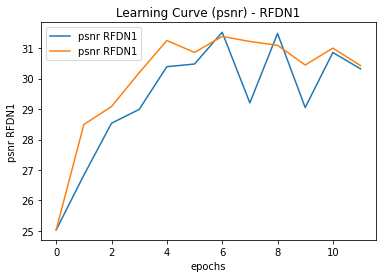

In [3]:
comp.plot_lc()

In [4]:
# comp.predict("/home/samuel/Documents/CMPUT511/Project/Data/val/LR/DIV2K_valid_LR_bicubic/X2/0801x2.png", img_name="/home/samuel/Documents/CMPUT511/Project/Checkpoints/checkpoint")

In [5]:
# values = comp.get_values()

# psnr1 = np.mean(values["psnr"]["model1"])
# psnr2 = np.mean(values["psnr"]["model2"])
# ssim1 = np.mean(values["ssim"]["model1"])
# ssim2 = np.mean(values["ssim"]["model2"])
# times1 = np.mean(values["times"]["model1"])
# times2 = np.mean(values["times"]["model2"])

# print(f"Average inference PSNR for model 1 ({str(model1)}): {psnr1}")
# print(f"Average inference PSNR for model 2 ({str(model1)}): {psnr2}\n")
# print(f"Average inference SSIM for model 1 ({str(model1)}): {ssim1}")
# print(f"Average inference SSIM for model 2 ({str(model1)}): {ssim2}\n")
# print(f"Average inference time for model 1 ({str(model1)}): {times1}")
# print(f"Average inference time for model 2 ({str(model1)}): {times2}")

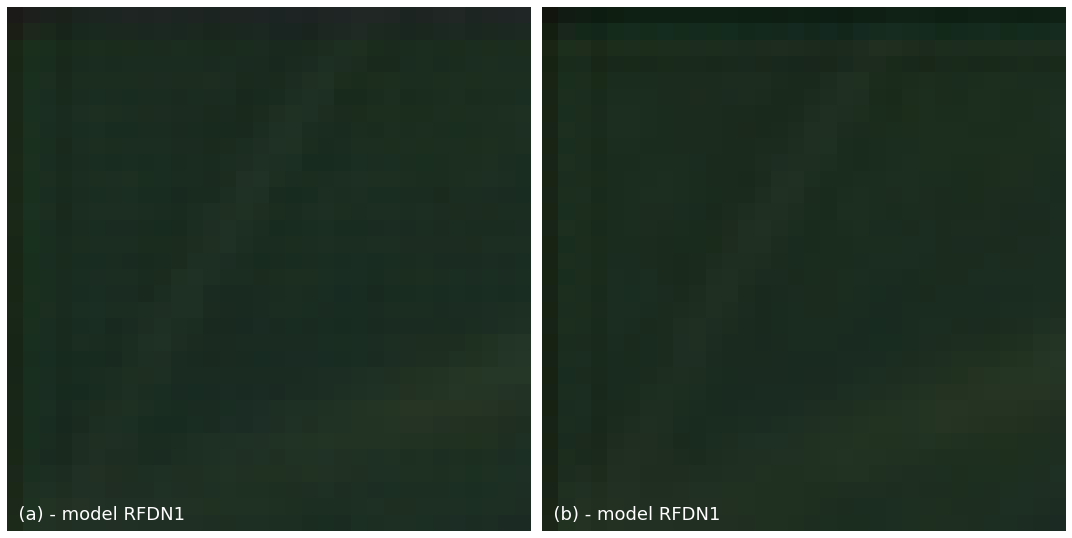

In [6]:
comp.compare_patches(98, size=32)